<a href="https://colab.research.google.com/github/Bae-hong-seob/University-3-1/blob/main/visual_computing/visual_computing_Mid_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4/23 중간고사 - 정리

## 1. Thresholding 이란? 
> Specific function is applied to pixels whose values are larger/less than a threshold value  
> 문턱값(threshold value)를 사용하는 이미지 프로세싱 알고리즘  
> ex) Threshold 값 보다 큰 값은 검은색, 작은 값은 흰색으로 처리 -> 임계값(기준값)  

## 2. Thresholding 기법 두가지
> ### 1) Global Thresholding
>> 하나의 global threshold 를 가지고 이미지 프로세싱  
> ### 2) Adaptive mean Thresholding(= local threshold)
>> 각각 픽셀에 따라 다른 threshold 값을 가지고 이미지 프로세싱  
> 각 픽셀을 중심으로 threshold value를 계산할 범위 설정  

.  
.      
> ### 1) Global Thresholding  
>> ex) cv.threshold(img,127,255,cv.THRESH_BINARY)

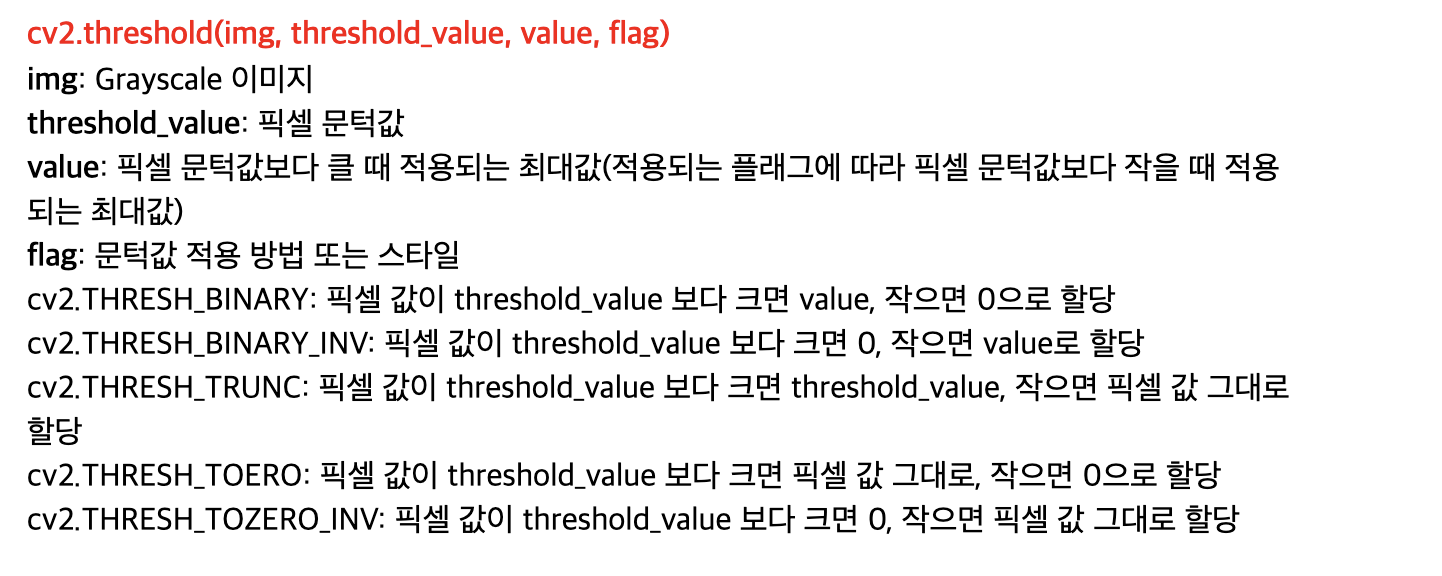

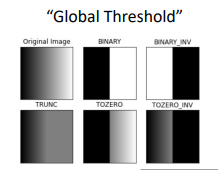

> ### 2) Adaptive Thresholding
>> th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2).

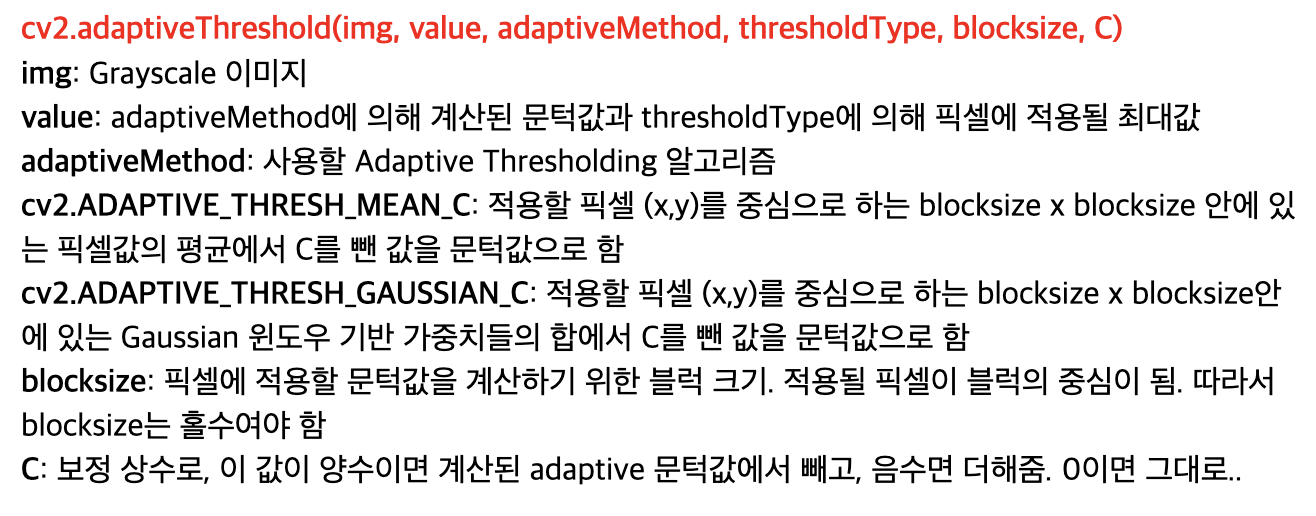

## 3. Otsu Threshold

Threshold value를 어떻게 잘 설정해야하나 ?  
> 수학적으로 영상을 분석해서 분류를 할 수 있는 기준점(임계값 = threshold)을 찾을 수 있지 않을까?  
> 대표적인 방법(Otsu method) : 히스토그램 분포를 분석해서 threshold value를 찾는 것  

threshold value를 127말고 수학적으로 더 잘 설정할 수는 없을까?

> Otsu threshold value maximizes the inter-class variance of the histogram (or minimizes the within-class variance).  
> Otsu Threshold value는 cluster(군집화) 된 class들의 분산(variance)는 최대로, 그리고 class(군집화) 내의 분산(variance)는 최소로 한다.  

th_v, th1 = cv.threshold(img, 127, 255, cv.THRESH_OTSU)
> 이때 threshold value 는 otsu에 의해 찾아지는 값으로 설정되므로 두번째 파라미터인 threshold value는 무시된다.  
> 따라서 두번째 파라미터는 아무거나 써도 된다.

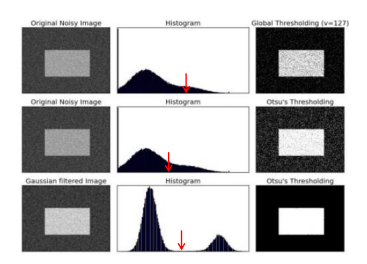

과제 1
> Why can the “adaptive thresholding” algorithm detect very reasonable edges in this picture?  

과제 2
> How do we decide the local threshold value?  
> How about Local-Otsu Thresholding?  



# --------------------------------------첫번째 part-------------------------------------

## 1. HE : Histogram Equalization  
> • To enhance the image’s contrast, this  
• spreads out the most frequent pixel intensity values  
• stretches out the intensity range of the image

> 사진의 대비를 높여 사진의 명암대비를 뚜렷하게 만드는 것  
> 사진의 명암대비가 낮다? -> 특정 Pixel value 값이 많이 관측된다.  
> 따라서 spreads out 진행해주는걸 Histogram Equalization이라고 한다.

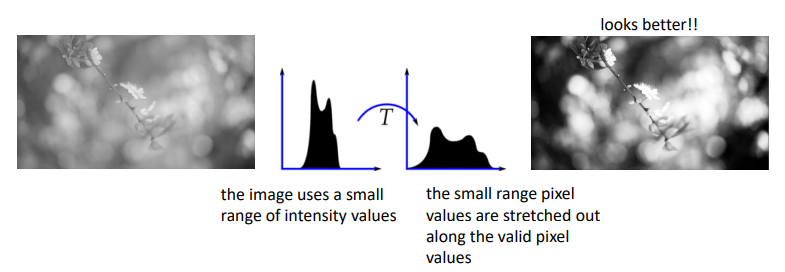

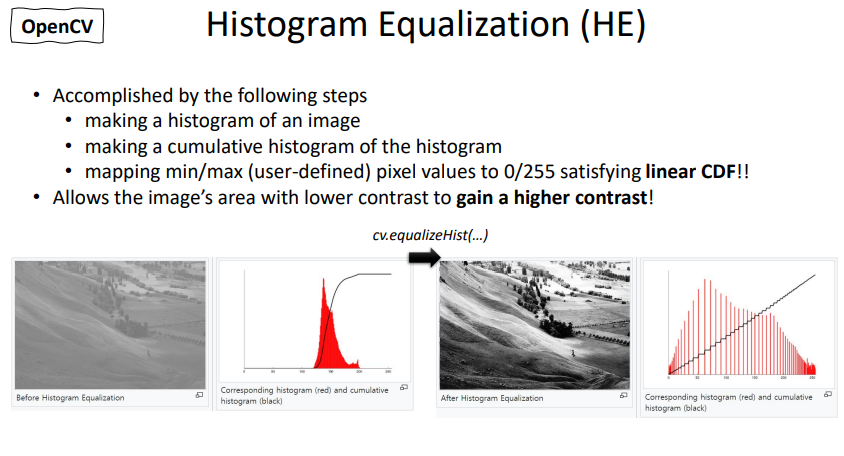

ㄴ cumulative : 누적, CDF : 누적분포함수  

위 사진과 같이 spreads out 진행  

## 2. Adaptive Histogram Equalization (AHE)  
> HE의 경우 모든 pixel value를 histogram으로 표현하고 equalization 진행했다.(=Global)  
> 이때 과소, 과대 밝기가 발생 
### 따라서 Adaptive(=local) HE 가 등장.  
> local size는 보통 8x8이 openCV에서 default값.  
> 이거도 과잉 적합이라는 문제가 존재

### 따라서 CLAHE 등장할 예정

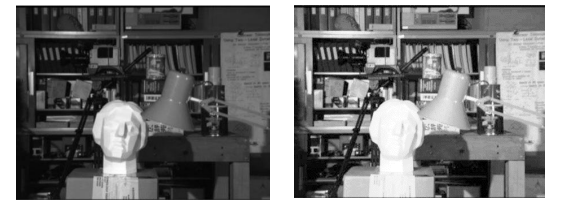

ㄴ 위 사진과 같이 과소, 과대 밝기의 문제가 발생.  

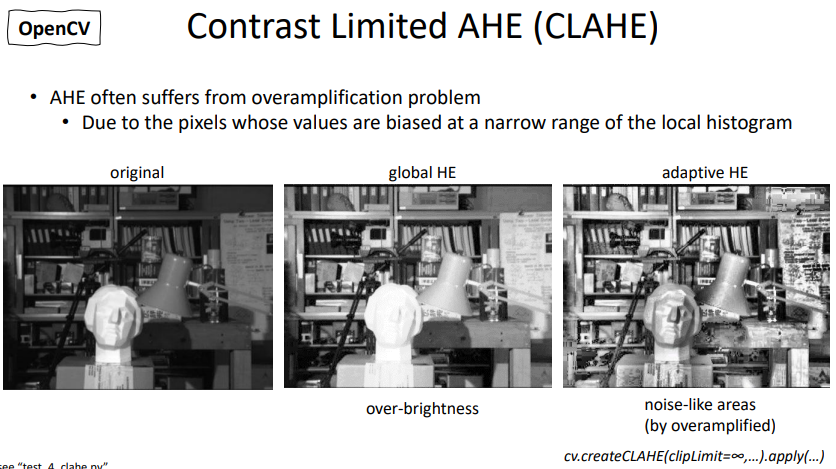

ㄴ 과잉적합 발생 원인
> 좁은 지역에서 HE를 진행하다보니 편향된 pixel에 대해서는 과잉적합이 일어나게 된다.  
> Due to the pixels whose values are biased at a narrow range of the local histogram



## 3. Contrast Limited AHE (CLAHE)  
> AHE의 과잉적합 문제를 해결하기 위한 방법  
> 명암대비의 수치를 제한함으로써 편향된 값들을 제거해버린다.  
> By limiting contrast (or, clipping contrast), avoid an over-sloped CDF of the local histogram

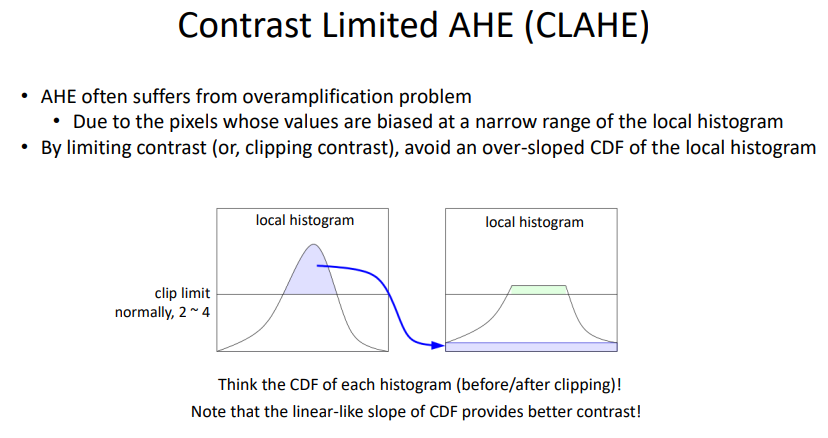

과제 3
> Gray-scale이 아닌 Color image에 대해서도 HE,AHE, CLAHE를 적용해보시오
>> HSV 모델로 변환하여 V(contrast)를 조절

# --------------------------------------두번째 part-------------------------------------

## Filters  
> 기본개념, 두가지 filter 소개

Filter is a function  
Filter used in the image processing
> changes per-pixel value according to the filter.  
> normally considers neighborhood pixels(using a mask). 


Filter == mask == Convolution.(filter를 거쳐서 나온 값==각 pixel이 filter에 의해서 계산된(곱해진) 값들의 합) 
> 보통 filter 내의 value가 1이 되도록 맞춘다.(기존 영상과 비슷한 영상이 프로세싱된다)  
> 근데 0이 되면(1이 아닌값이라면 ?) 기본의 사진의 어떤 특정 feature만 두드러지게끔 프로세싱 된다.  

기본적으로 Linear Filter. 
이런 Lineaer Filter에 대해서는 많은 Presets이 존재한다.  
> Identity, Sharpen, Box blur(normalized), Gaussian blur 등등  

blur filter -> 보통 noise가 많을 때 사용, 대신 퀄리티가 좀 떨어진다.  
convolution 값이 음수라면 그걸 올바른 color map을 사용해서 다시 mapping을 진행한다. 
> 따라서 어떻게 음수값을 처리했냐에 따라 결과값이 다르게 나온다.  

## 1. Sharpen filter 사용 ( filter 값의 합이 1 )  

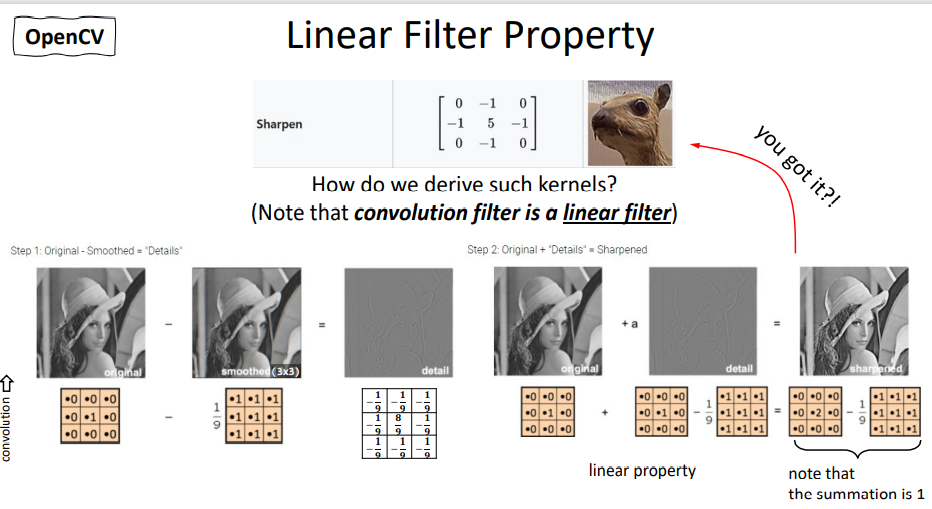

> filter의 연산 -> reverse 관점에서 설명 가능  
> 왜 Sharpen filter를 사용했을때 경계가 뚜렷하면서 원본가 비슷한 사진이 나타나는지 설명함.  
>> 원본 사진 - (3x3 smoothed) = detail 사진  
>> smoothed 사진은 Gaussian blur를 사용한 사진  
>> 이후 원본사진 + detail 사진 = sharpened 사진. 

> 이러한 관점에서 reverse 를 했을때 (=sharpened 사진으로부터 원본 사진 찾기)  
> sharpened 사진 - 원본사진 = filter
> 이때 filter는 a * matrix 인데 일때 a를 찾는게 아마도 문제.  

## 2. Morphological Filters(형태학적 필터)  
영상을 변환시켜주는 필터  
> 어떤변환? 크게 두가지 erosion or dilation(침식 or 팽창)  
> erosion = 축소, dilation = 확장  
> 축소 = 주변 색과 비슷해짐  
> 확장 = 중심이 되는 색이 주변으로 퍼짐
>> cv.erode() , cv.dilation()  



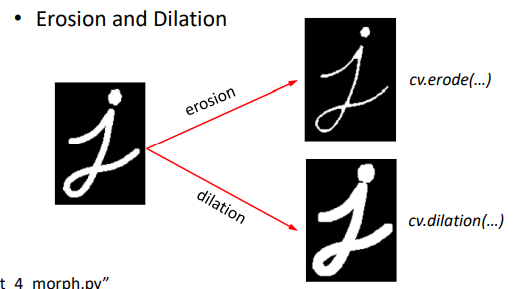

> 이때 thresholding value를 사용해서 원하는걸 구현함.  
> mask value(convolution) + thresholding  

원하는 결과를 얻기 위한 기법 세가지  
opening, closing, gradient  

opening : erosion 후 dilation  
closing : dliation 후 erosion  
gradient : ???  

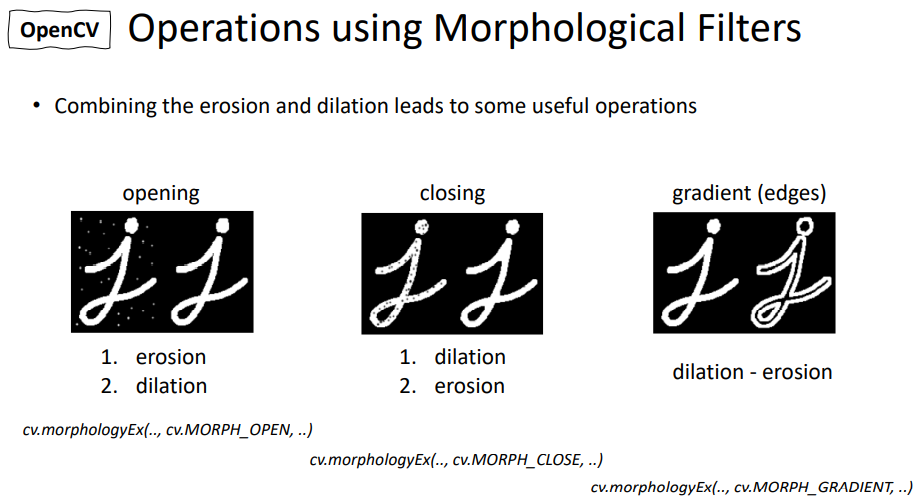

ㄴ 페이퍼용지에 적어두는게 좋을듯

## 이미지 피라미드 (Image Pyramid)
> An image is subject to repeated smoothing and subsampling

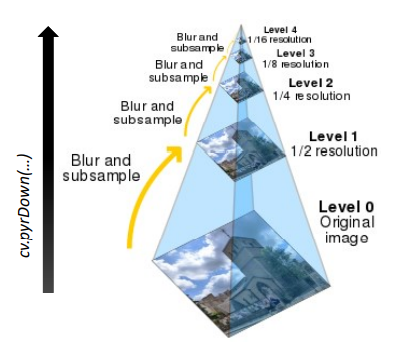

Down sampling과정

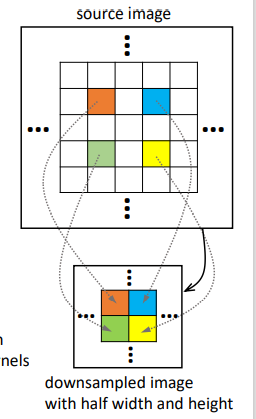

ㄴ 두칸씩 이동하는데 바로옆으로 이동하면 blur처리이지 압축이 아니다.  
가로, 세로를 1/2, 따라서 영상의 크기는 1/4가 저장된다.  
왜 하나? 하나의 영상에 대해 여러크기의 영상을 만들기 위해.
> 추후에 downsample - Gussian = Laplacian  

## blur 와 shapen -> low, high frequency 이해

### What does blurring take away?
> Deteails(=sharp parts)  
> 따라서 sharpening filter = high-frequency filter = Residual image  
> 왜? 원본 - blur = sharpen 이기 때문에 잔차 image  

원본이미지에 대해 high-pass filter, low-pass filter 를 적용한 결과값 확인

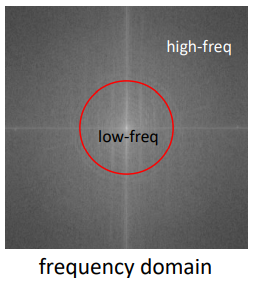

ㄴ 가운데로 갈수록 low-frequency이다.

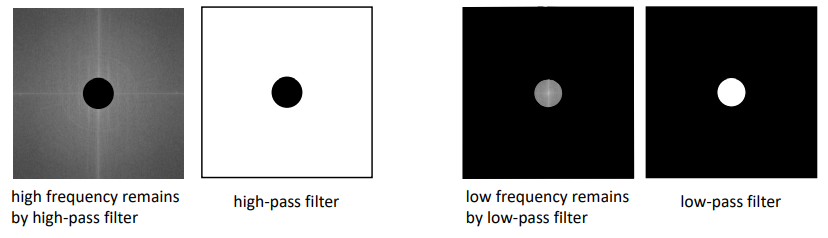

ㄴ high-pass filter 적용시 high-frequency만 통과한다.

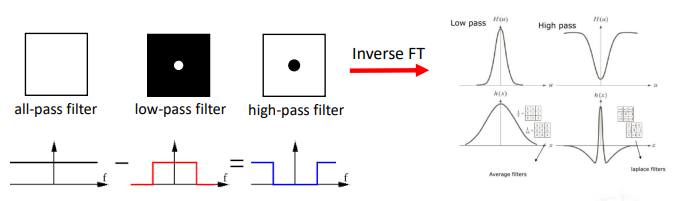

ㄴ 따라서 위와같이 그래프로 filter를 나타낼 수 있고, laplacian 필터의 모양은 그냥 암기하자. 그렇게 생겼다.  
Now, we know that (original – smoothed) simply achieves the Laplacian filtered image!

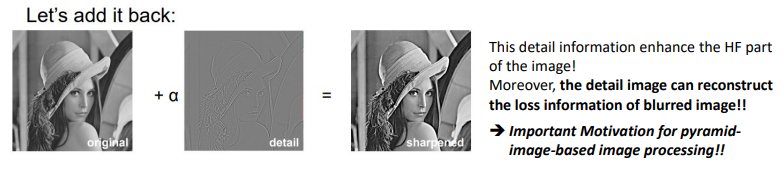

ㄴ 이미지 피라미드의 중요한 이유
>  the detail image can reconstruct 
the loss information of blurred image!!

Now, we know that (original – smoothed) simply achieves the Laplacian filtered image!  
따라서 원본이미지 - blur(=Gussian) = Laplacian  
> LPI (L) = GPI (L) – upsample(GPI (L+1))  
> 해당 방법으로 Laplacian Pyramid Image 만들어보자.

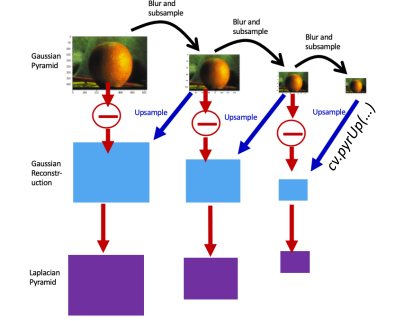

## Image stitch(이미지 합성, 붙이기)

**How do we achieve the optimal blending?**  

### Image Blending using Image Pyramids
• Using the pyramid image and “Laplacian image addition” for image reconstruction  
> 1. 두 이미지(사과,오렌지)에 대해 각각 Gaussian pyramid images, Laplacian pyramid images 만들기.  
> 2. 두 이미지를 half, half 붙여서 합성사진으로 Gaussian pyramid images 제작. Laplacian은 따로따로 만들 것. 
> 3. 사과, 오렌지 두 사진을 half, half 붙인 합성사진에 대해서 Laplacian pyramid images 하지말것.  
>> 왜냐? 그러면 합성하여 가운데가 high-frequency로 남게되어 stitch 결과물이 부자연스러워보인다.
> 4. 두 이미지에 대해 각각 만든 Laplacian pyramid images를 half, half stitch하여 하나의 Laplacian pyramid images로 만든다.  
> 5. 가장 작은 크기의 Gaussian pyramid image를 upsample  
> 6. upsample 한 이미지 + Laplacian pyramid image = sharpen image
>> 영상의 크기가 맞는거끼리 더하기  
> 7. sharpen image + Laplacian pyramid image = more sharpen image  
> 8. 가장 큰영상 크기까지 반복하여 수행



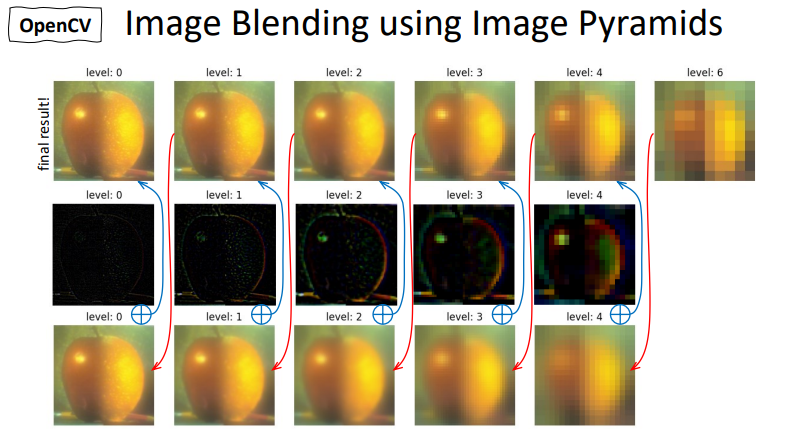

ㄴ 이때 가장 작은 영상이 아니라 더 큰 영상의 Gaussian pyramid image에서 시작해도 된다.  
> • of course, you can start the higher level of the direct stitching image  
➔ Less continuous but More details (trade-off!!)  

### Laplacian image = 'detail'  
> The “detail” (original - smoothed) image can  
• enhance the image sharpness of the original image  
**• reconstruct the high frequency details of the blurred image**



과제 4
> 손바닥에 눈 붙이기

## Template Matching : 이미지 매칭 테크닉
> Find areas of an image that match (are similar) to a template (exemplar) image (patch)  
> > template image를 어떤 한 image속에 있는지 판별하는 것.  
> cv.matchTemplate() 사용   
> • In many cases, “matching” must consider  
• size, rotation, and inconsistent brightness  
사이즈, 회전, 밝기 등등도 맞춰주고 진행해야한다.  



## Image Segmentation 
> • Partition an image into multiple parts or regions (areas)  
> • Often involve the tasks as follows  
• Separating foreground from background  
• Clustering regions of pixels based on similarities/discontinuities in color or shape

> 사진을 여러개의 구역으로 나누는 것.  
> 예를 들면 배경과 전경, clustering(군집화)

나누는 기준
1. Thresholding-based segmentation  
2. Histogram-based segmentation  

Image Segmentation 알고리즘 종류 -> CNN배우고 알아보자  
> 1. Discontinuity based techniques
>> 1) point detection  
>> 2) Line detection  
>> 3) Edge detection  
> 2. Thresholding
> 3. Region based techniques
>> 1) Region growing  
>> 2) region splitting and merging  



## Morphological Filter

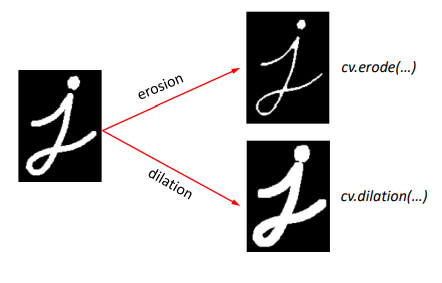

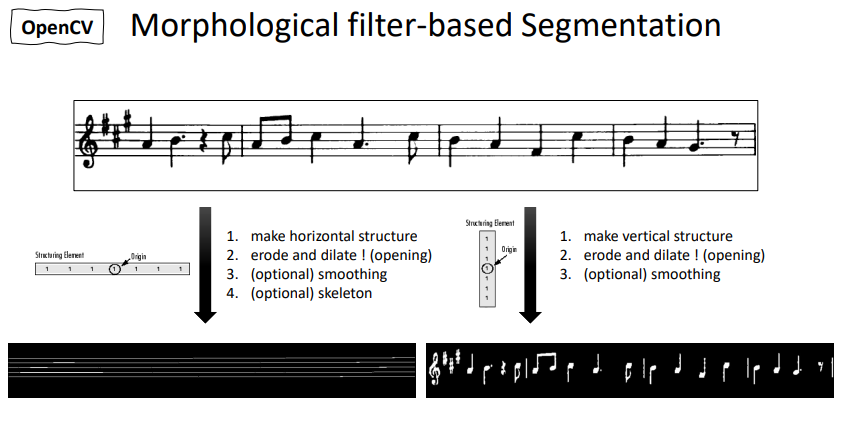

ㄴ 왜 등장? 잘 모르겠음.. 그냥 알아두자